<img src="img/dask-cluster.svg" width="600">

There are several projects in the Dask ecosystem for easily deploying clusters on commonly used computing resources:

- [Dask-Jobqueue](https://jobqueue.dask.org/en/latest/) for deploying Dask on job queuing systems (e.g. PBS, Slurm, etc.)
- [Dask-Kubernetes](https://kubernetes.dask.org/en/latest/) for deploying Dask using native Kubernetes APIs
- [Dask-Cloudprovider](https://cloudprovider.dask.org/en/latest/) for deploying Dask clusters on various cloud platforms (e.g. AWS, GCP, Azure, etc.)
- [Dask-Yarn](https://yarn.dask.org/en/latest/) for deploying Dask on YARN clusters
- [Dask-MPI](http://mpi.dask.org/en/latest/) for deploying Dask on existing MPI environments


#### Related Documentation

- [Cluster setup](https://docs.dask.org/en/latest/setup.html)

### Dask-jobqueue

The Dask-jobqueue project makes it easy to deploy Dask on common job queuing systems typically found in high performance supercomputers, academic research institutions, and other clusters. It provides a convenient interface that is accessible from interactive systems like Jupyter notebooks, or batch jobs.

Launching clusters will follows a similar pattern as using Dask's built-in `LocalCluster`:

```python

# Launch a Dask cluster on a HTCondor job queueing system [For this you will need HTCondor related configurations]
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(...)


# Launch a Dask cluster on a SLURM job queueing system [For this you will need SLURM related configurations]
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(...)


# Launch a Dask cluster on a PBS job queueing system [For this you will need PBS related configurations]
from dask_jobqueue import PBSCluster
cluster = PBSCluster(...)


# Launch a Dask cluster on a Kubernetes cluster [For this you will need Kubernetes related configurations]
from dask_kubernetes import KubeCluster
cluster = KubeCluster(...)

```

### CoffeaCasaCluster

The "scale out" process at Coffea-Casa Analysis Facility is accomplished by using custom dask-jobqueue class that helps easily deploy Dask worker over UNL Tier-2 HTCondor batch queue or Kubernetes cluster available at UNL.

In [19]:
# Dont forget to delete Dask cluster object
if cluster:
    cluster.close()
    
from coffea_casa import CoffeaCasaCluster
cluster = CoffeaCasaCluster()
cluster

2023-07-24 04:16:04,846 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899401.0--', 'htcondor--18899402.0--', 'htcondor--18899400.0--', 'htcondor--18899403.0--', 'htcondor--18899404.0--')
2023-07-24 04:16:05,199 - distributed.scheduler - INFO - Scheduler closing...
2023-07-24 04:16:05,211 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: closing, memory: 0, processing: 0>
2023-07-24 04:16:05,212 - distributed.core - INFO - Removing comms to tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:16:05,212 - distributed.scheduler - INFO - Lost all workers
2023-07-24 04:16:05,257 - distributed.scheduler - INFO - Scheduler closing all comms
2023-07-24 04:16:06,290 - distributed.scheduler - INFO - State start
2023-07-24 04:16:06,295 - distributed.scheduler - INFO - Clear task state
2023

{'protocol': 'tls://', 'security': Security(require_encryption=True, tls_ca_file=Local (/etc/cmsaf-secrets/ca.pem), tls_client_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_client_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_min_version=771, tls_scheduler_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_scheduler_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_key=Local (/etc/cmsaf-secrets/hostcert.pem)), 'log_directory': 'logs', 'silence_logs': 'DEBUG', 'scheduler_options': {'port': 8786, 'dashboard_address': '8787', 'protocol': 'tls', 'external_address': 'tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786'}, 'job_extra': {'universe': 'docker', 'docker_image': 'hub.opensciencegrid.org/coffea-casa/cc-analysis-ubuntu:2023.04.05', 'container_service_names': 'dask,nanny', 'dask_container_port': 8786, 'nanny_container_port': 8001, 'transfer_input_files': '/home/cms-jovyan/requirements.txt, /home/cms-jo

AttributeError: 'Tab' object has no attribute '_ipython_display_'

Dashboard: /user/oksana.shadura@cern.ch/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tls://192.168.197.232:8786,Workers: 0
Dashboard: /user/oksana.shadura@cern.ch/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


2023-07-24 04:16:06,406 - distributed.scheduler - INFO - Receive client connection: Client-68279a85-29d8-11ee-80f7-5a7513c347f8
2023-07-24 04:16:06,407 - distributed.core - INFO - Starting established connection
2023-07-24 04:16:07,817 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: undefined, memory: 0, processing: 0>
2023-07-24 04:16:07,819 - distributed.scheduler - INFO - Starting worker compute stream, tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:16:07,819 - distributed.core - INFO - Starting established connection


In [22]:
# Scale up to 2 workers
cluster.scale(2)

In [23]:
# Retrieve cluster logs
cluster.get_logs()

{'Cluster': '',
 'Scheduler': "2023-07-24 04:16:06,290 - distributed.scheduler - INFO - State start\n2023-07-24 04:16:06,295 - distributed.scheduler - INFO - Clear task state\n2023-07-24 04:16:06,297 - distributed.scheduler - INFO -   Scheduler at: tls://192.168.197.232:8786\n2023-07-24 04:16:06,297 - distributed.scheduler - INFO -   dashboard at:                     :8787\n2023-07-24 04:16:06,406 - distributed.scheduler - INFO - Receive client connection: Client-68279a85-29d8-11ee-80f7-5a7513c347f8\n2023-07-24 04:16:07,817 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: running, memory: 0, processing: 0>\n2023-07-24 04:16:07,819 - distributed.scheduler - INFO - Starting worker compute stream, tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788",
 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788': "2023-07-24 04:16:07,805 - distributed.worker - INFO -       Start worker at: tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788\n2023-07-24 04:16:07,805 - distributed.worker - INFO -          Listening to: tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788\n2023-07-24 04:16:07,805 - distributed.worker - INFO -          dashboard at: oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:35873\n2023-07-24 04:16:07,805 - distributed.worker - INFO - Waiting to connect to: tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786\n2023-07-24 04:16:07,805 - distributed.worker - INFO - -------------------------------------------------\n2023-07-24 04:16:07,805 - distributed.worker - INFO -               Threads:                          2\n2023-07-24 04:16:07,805 - distributed.worker - INFO -                Memory:                   6.00 GiB\n2023-07-24 04:16:07,805 - distributed.worker - INFO -       Local Directory: /home/cms-jovyan/dask-worker-space/worker-g52m_kgh\n2023-07-24 04:16:07,805 - distributed.worker - INFO - -------------------------------------------------\n2023-07-24 04:16:07,819 - distributed.worker - WARNING - Mismatched versions found\n\n+---------+----------------+----------------+--------------------------------------+\n| Package | This Worker    | scheduler      | workers                              |\n+---------+----------------+----------------+--------------------------------------+\n| python  | 3.8.15.final.0 | 3.8.16.final.0 | {'3.8.15.final.0', '3.8.16.final.0'} |\n+---------+----------------+----------------+--------------------------------------+\n2023-07-24 04:16:07,819 - distributed.worker - INFO -         Registered to: tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786\n2023-07-24 04:16:07,819 - distributed.worker - INFO - -------------------------------------------------"}

In [24]:
# Shut down cluster
cluster.close()

2023-07-24 04:17:10,920 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899405.0--',)
2023-07-24 04:17:10,990 - distributed.scheduler - INFO - Scheduler closing...
2023-07-24 04:17:11,002 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: closing, memory: 0, processing: 0>
2023-07-24 04:17:11,002 - distributed.core - INFO - Removing comms to tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:17:11,003 - distributed.scheduler - INFO - Lost all workers
2023-07-24 04:17:11,047 - distributed.scheduler - INFO - Scheduler closing all comms
2023-07-24 04:17:41,066 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


# Inspecting a cluster's state

In this section we'll:

1. Familiarize ourselves with Dask's scheduler and worker processes
2. Explore the various state that's tracked throughout the cluster
3. Learn how to inspect remote scheduler and worker processes

Dask has a a variety of ways to provide users insight into what's going on during their computations. For example, Dask's [diagnositc dashboard](https://docs.dask.org/en/latest/diagnostics-distributed.html) displays real-time information about what tasks are current running, overal progress on a computation, worker CPU and memory load, statistical profiling information, and much more. Additionally, Dask's [performance reports](https://distributed.dask.org/en/latest/diagnosing-performance.html#performance-reports) allow you to save the diagnostic dashboards as static HTML plots. Performance reports are particularly useful when benchmarking/profiling workloads or when sharing workload performance with colleagues.

In [29]:
from dask.distributed import LocalCluster, Client
from coffea_casa import CoffeaCasaCluster

# Dont forget to delete Dask cluster object
if cluster:
    cluster.close()
    
cluster = CoffeaCasaCluster()
cluster.scale(5)

client = Client(cluster)
cluster

2023-07-24 04:26:09,636 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899406.0--',)
2023-07-24 04:26:09,636 - distributed.scheduler - INFO - Retiring worker tls://red-c7125.unl.edu:43691
2023-07-24 04:26:09,637 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7125.unl.edu:43691; 21 keys are being moved away.
2023-07-24 04:26:09,690 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://red-c7125.unl.edu:43691', name: htcondor--18899406.0--, status: closing_gracefully, memory: 21, processing: 0>
2023-07-24 04:26:09,691 - distributed.core - INFO - Removing comms to tls://red-c7125.unl.edu:43691
2023-07-24 04:26:09,691 - distributed.scheduler - INFO - Retired worker tls://red-c7125.unl.edu:43691
2023-07-24 04:26:09,791 - distributed.scheduler - INFO - Scheduler closing...
2023-07-24 04:26:09,804 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name

{'protocol': 'tls://', 'security': Security(require_encryption=True, tls_ca_file=Local (/etc/cmsaf-secrets/ca.pem), tls_client_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_client_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_min_version=771, tls_scheduler_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_scheduler_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_key=Local (/etc/cmsaf-secrets/hostcert.pem)), 'log_directory': 'logs', 'silence_logs': 'DEBUG', 'scheduler_options': {'port': 8786, 'dashboard_address': '8787', 'protocol': 'tls', 'external_address': 'tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786'}, 'job_extra': {'universe': 'docker', 'docker_image': 'hub.opensciencegrid.org/coffea-casa/cc-analysis-ubuntu:2023.04.05', 'container_service_names': 'dask,nanny', 'dask_container_port': 8786, 'nanny_container_port': 8001, 'transfer_input_files': '/home/cms-jovyan/requirements.txt, /home/cms-jo

2023-07-24 04:26:11,123 - distributed.scheduler - INFO - Receive client connection: Client-08abd67a-29d9-11ee-80f7-5a7513c347f8
2023-07-24 04:26:11,124 - distributed.core - INFO - Starting established connection
2023-07-24 04:26:11,128 - distributed.scheduler - INFO - Receive client connection: Client-37b2a644-29da-11ee-80f7-5a7513c347f8
2023-07-24 04:26:11,128 - distributed.core - INFO - Starting established connection


AttributeError: 'Tab' object has no attribute '_ipython_display_'

Dashboard: /user/oksana.shadura@cern.ch/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tls://192.168.197.232:8786,Workers: 0
Dashboard: /user/oksana.shadura@cern.ch/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


2023-07-24 04:26:12,755 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: undefined, memory: 0, processing: 0>
2023-07-24 04:26:12,756 - distributed.scheduler - INFO - Starting worker compute stream, tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:26:12,756 - distributed.core - INFO - Starting established connection


In [30]:
import dask.array as da
from dask.distributed import performance_report

with performance_report("my_report.html"):
    x = da.arange(100_000, chunks=10)
    x.sum().compute()

2023-07-24 04:26:39,451 - distributed.worker - INFO - Run out-of-band function 'lambda'


Sometimes it can be useful to dive more deeply into the internals of your cluster and directly inspect the state of your scheduler and workers. Let's start by submitting some tasks to the cluster to be computed.

In [31]:
import random

def double(x):
    random.seed(x)
    # Simulate some random task failures
    if random.random() < 0.1:
        raise ValueError("Oh no!")
    return 2 * x

futures = client.map(double, range(50))

2023-07-24 04:27:26,933 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://red-c7125.unl.edu:37707', name: htcondor--18899418.0--, status: undefined, memory: 0, processing: 0>
2023-07-24 04:27:26,934 - distributed.scheduler - INFO - Starting worker compute stream, tls://red-c7125.unl.edu:37707
2023-07-24 04:27:26,935 - distributed.core - INFO - Starting established connection
2023-07-24 04:27:27,923 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://red-c7125.unl.edu:45895', name: htcondor--18899419.0--, status: undefined, memory: 0, processing: 0>
2023-07-24 04:27:27,924 - distributed.scheduler - INFO - Starting worker compute stream, tls://red-c7125.unl.edu:45895
2023-07-24 04:27:27,925 - distributed.core - INFO - Starting established connection
2023-07-24 04:27:33,225 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://red-c7125.unl.edu:44217', name: htcondor--18899420.0--, status: undefined, memory: 0, processing: 0>
2023-07-24 0

One of the nice things that we have the direct access the `Scheduler` Python object. This allows us to easily inspect the scheduler directly.

In [32]:
scheduler = cluster.scheduler
scheduler

<Scheduler 'tls://192.168.197.232:8786', workers: 4, cores: 8, tasks: 50>

ℹ️ Note that often times you won't have direct access to the `Scheduler` Python object (e.g. when the scheduler is running on separate machine). In these cases it's still possible to inspect the scheduler and we will discuss how to do this later on.

The scheduler tracks **a lot** of state. Let's start to explore the scheduler to get a sense for what information it keeps track of.

In [33]:
scheduler.address   # Scheduler's address

'tls://192.168.197.232:8786'

In [34]:
scheduler.time_started   # Time the scheduler was started

1690172770.876439

In [35]:
dict(scheduler.workers)

{'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788': <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: running, memory: 46, processing: 0>,
 'tls://red-c7125.unl.edu:37707': <WorkerState 'tls://red-c7125.unl.edu:37707', name: htcondor--18899418.0--, status: running, memory: 0, processing: 0>,
 'tls://red-c7125.unl.edu:44217': <WorkerState 'tls://red-c7125.unl.edu:44217', name: htcondor--18899420.0--, status: running, memory: 0, processing: 0>,
 'tls://red-c7125.unl.edu:45895': <WorkerState 'tls://red-c7125.unl.edu:45895', name: htcondor--18899419.0--, status: running, memory: 0, processing: 0>}

In addition to the state of each worker, the scheduler also tracks information for each task it has been asked to run.

In [46]:
scheduler.tasks

{'double-a4c8e7dab320e02e53872af85fbe3a49': <TaskState 'double-a4c8e7dab320e02e53872af85fbe3a49' memory>,
 'double-baae9d6b9a533fd6e18696c7b7a327f9': <TaskState 'double-baae9d6b9a533fd6e18696c7b7a327f9' memory>,
 'double-3dc71d0fc4ddbf2dca29283ee63ee1d8': <TaskState 'double-3dc71d0fc4ddbf2dca29283ee63ee1d8' erred>,
 'double-ccc86b22ef5c2a0a4f09d966dd12c406': <TaskState 'double-ccc86b22ef5c2a0a4f09d966dd12c406' memory>,
 'double-6b56d9a8ec110da5e4fa78fb16425ec5': <TaskState 'double-6b56d9a8ec110da5e4fa78fb16425ec5' erred>,
 'double-bdfab18ae7301fbd010b3d360f2a0445': <TaskState 'double-bdfab18ae7301fbd010b3d360f2a0445' memory>,
 'double-f227d747fd6fef1787170d67e812df30': <TaskState 'double-f227d747fd6fef1787170d67e812df30' memory>,
 'double-ff9e1b9f4697fc0257027009c723bba4': <TaskState 'double-ff9e1b9f4697fc0257027009c723bba4' memory>,
 'double-29e03d1bdbd6c7598cb15b3158349188': <TaskState 'double-29e03d1bdbd6c7598cb15b3158349188' memory>,
 'double-efb7b6953d12d7727ea276efb4c216b0': <Tas

In [53]:
task_state = next(iter(scheduler.tasks.values()))

In [54]:
task_state

<TaskState 'double-a4c8e7dab320e02e53872af85fbe3a49' memory>

In [55]:
task_state.key   # Task's name (unique identifier)

'double-a4c8e7dab320e02e53872af85fbe3a49'

In [56]:
task_state.state   # Task's state (e.g. "memory", "waiting", "processing", "erred", etc.)

'memory'

## Accessing remote scheduler and workers

As we noted earlier, often times you won't have direct access to the `Scheduler` or `Worker` Python objects for your cluster. However, in these cases it's still possible to examine the state of the scheduler and workers in your cluster using the `Client.run` ([docs](https://distributed.dask.org/en/latest/api.html#distributed.Client.run)) and `Client.run_on_scheduler`([docs](https://distributed.dask.org/en/latest/api.html#distributed.Client.run_on_scheduler)) methods.

`Client.run` allows you to run a function on worker processes in your cluster. If the function has a `dask_worker` parameter, then that variable will be populated with the `Worker` instance when the function is run. Likewise, `Client.run_on_scheduler` allows you to run a function on the scheduler processes in your cluster. If the function has a `dask_scheduler` parameter, then that variable will be populated with the `Scheduler` instance when the function is run.

Let's look at some examples.

In [58]:
import os

result = client.run(os.getpid)
result

{'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788': 5384,
 'tls://red-c7125.unl.edu:37707': 82,
 'tls://red-c7125.unl.edu:44217': 82,
 'tls://red-c7125.unl.edu:45895': 82}

In [61]:
def get_worker_name(dask_worker):
    return dask_worker.name

client.run(get_worker_name)

{'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788': 'kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946',
 'tls://red-c7125.unl.edu:37707': 'htcondor--18899418.0--',
 'tls://red-c7125.unl.edu:44217': 'htcondor--18899420.0--',
 'tls://red-c7125.unl.edu:45895': 'htcondor--18899419.0--'}

Similarly, we can do the same thing on the scheduler by using `Client.run_on_scheduler`

In [62]:
client.run_on_scheduler(os.getpid)

2023-07-24 04:32:22,925 - distributed.worker - INFO - Run out-of-band function 'getpid'


247

In [63]:
def get_erred_tasks(dask_scheduler):
    return [key for key, ts in dask_scheduler.tasks.items() if ts.state == "erred"]

client.run_on_scheduler(get_erred_tasks)

2023-07-24 04:32:25,227 - distributed.worker - INFO - Run out-of-band function 'get_erred_tasks'


['double-3dc71d0fc4ddbf2dca29283ee63ee1d8',
 'double-6b56d9a8ec110da5e4fa78fb16425ec5',
 'double-c18b1f012f895e1db56d1804f1f27483',
 'double-b3059e2f4862946a66bd81c33a37b708']

In [64]:
cluster.close()

2023-07-24 04:32:28,784 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899420.0--', 'htcondor--18899418.0--', 'htcondor--18899419.0--')
2023-07-24 04:32:28,785 - distributed.scheduler - INFO - Retiring worker tls://red-c7125.unl.edu:45895
2023-07-24 04:32:28,785 - distributed.scheduler - INFO - Retiring worker tls://red-c7125.unl.edu:37707
2023-07-24 04:32:28,785 - distributed.scheduler - INFO - Retiring worker tls://red-c7125.unl.edu:44217
2023-07-24 04:32:28,786 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7125.unl.edu:45895; no unique keys need to be moved away.
2023-07-24 04:32:28,786 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7125.unl.edu:37707; no unique keys need to be moved away.
2023-07-24 04:32:28,786 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7125.unl.edu:44217; no unique keys need to be moved away.
2023-07-24 04:32:28,786 - distributed.scheduler - INFO - Remove worker <W

#### Related Documentation

- [Dask worker](https://distributed.dask.org/en/latest/worker.html)
- [Scheduling state](https://distributed.dask.org/en/latest/scheduling-state.html)

# Extending the scheduler and workers: Dask's plugin system (advanced)

In this section we'll discuss Dask's scheduler and worker plugin systems and write our own plugin to extend the scheduler's functionality.

To help facilitate extend the functionality of the scheduler and/or workers in a cluster, Dask has scheduler and worker plugin systems which enable you to hook into different events that happen throughout a cluster's lifecycle. This allows you to run custom code when a specific type of event occurs on the cluster.

For example, the [worker plugin system](https://distributed.dask.org/en/latest/plugins.html#worker-plugins) enables you run custom code when the following events occur:

1. Worker starts or stops
2. When a worker releases a task
3. When a task changes state (e.g. "processing" to "memory")

Implementing your own custom plugin consists of creating a Python class with certain methods (each method corresponds to a particular lifecycle event).

In [72]:
from distributed import SchedulerPlugin, WorkerPlugin, NannyPlugin

In [73]:
# Lifecycle SchedulerPlugin methods
[attr for attr in dir(SchedulerPlugin) if not attr.startswith("_")]

['add_client',
 'add_worker',
 'before_close',
 'close',
 'remove_client',
 'remove_worker',
 'restart',
 'start',
 'transition',
 'update_graph']

In [74]:
# Lifecycle WorkerPlugin methods
[attr for attr in dir(WorkerPlugin) if not attr.startswith("_")]

['setup', 'teardown', 'transition']

In [75]:
# Lifecycle WorkerPlugin methods
[attr for attr in dir(NannyPlugin) if not attr.startswith("_")]

['restart', 'setup', 'teardown']

2023-07-24 04:35:53,499 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://red-c7126.unl.edu:43965', name: htcondor--18899427.0--, status: undefined, memory: 0, processing: 0>
2023-07-24 04:35:53,500 - distributed.scheduler - INFO - Starting worker compute stream, tls://red-c7126.unl.edu:43965
2023-07-24 04:35:53,501 - distributed.core - INFO - Starting established connection
2023-07-24 04:35:54,949 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://red-c7125.unl.edu:44503', name: htcondor--18899426.0--, status: undefined, memory: 0, processing: 0>
2023-07-24 04:35:54,950 - distributed.scheduler - INFO - Starting worker compute stream, tls://red-c7125.unl.edu:44503
2023-07-24 04:35:54,950 - distributed.core - INFO - Starting established connection


For the exact signature of each method, please refer to the [`SchedulerPlugin`](https://distributed.dask.org/en/latest/plugins.html#scheduler-plugins), [`NannyPlugin`](https://distributed.dask.org/en/latest/plugins.html#nanny-plugins) and [`WorkerPlugin`](https://distributed.dask.org/en/latest/plugins.html#worker-plugins) documentation.

Let's looks at an example scheduler plugin.

In [76]:
class Counter(SchedulerPlugin):
    """Keeps a running count of the total number of completed tasks"""
    def __init__(self):
        self.n_tasks = 0

    def transition(self, key, start, finish, *args, **kwargs):
        if start == "processing" and finish == "memory":
            self.n_tasks += 1

    def restart(self, scheduler):
        self.n_tasks = 0

To add a custom scheduler plugin to your cluster, use the `Scheduler.add_plugin` method:

In [77]:
# Dont forget to delete Dask cluster object
if cluster:
    cluster.close() 
cluster = CoffeaCasaCluster()
cluster.scale(3)
client = Client(cluster)
cluster

# Instantiate and add the Counter to our cluster
counter = Counter()
cluster.scheduler.add_plugin(counter)

2023-07-24 04:38:29,282 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899427.0--', 'htcondor--18899426.0--')
2023-07-24 04:38:29,282 - distributed.scheduler - INFO - Retiring worker tls://red-c7125.unl.edu:44503
2023-07-24 04:38:29,283 - distributed.scheduler - INFO - Retiring worker tls://red-c7126.unl.edu:43965
2023-07-24 04:38:29,283 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7125.unl.edu:44503; no unique keys need to be moved away.
2023-07-24 04:38:29,284 - distributed.active_memory_manager - INFO - Retiring worker tls://red-c7126.unl.edu:43965; no unique keys need to be moved away.
2023-07-24 04:38:29,284 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://red-c7125.unl.edu:44503', name: htcondor--18899426.0--, status: closing_gracefully, memory: 0, processing: 0>
2023-07-24 04:38:29,284 - distributed.core - INFO - Removing comms to tls://red-c7125.unl.edu:44503
2023-07-24 04:38:29,285 - distributed.scheduler - INFO 

{'protocol': 'tls://', 'security': Security(require_encryption=True, tls_ca_file=Local (/etc/cmsaf-secrets/ca.pem), tls_client_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_client_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_min_version=771, tls_scheduler_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_scheduler_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_key=Local (/etc/cmsaf-secrets/hostcert.pem)), 'log_directory': 'logs', 'silence_logs': 'DEBUG', 'scheduler_options': {'port': 8786, 'dashboard_address': '8787', 'protocol': 'tls', 'external_address': 'tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786'}, 'job_extra': {'universe': 'docker', 'docker_image': 'hub.opensciencegrid.org/coffea-casa/cc-analysis-ubuntu:2023.04.05', 'container_service_names': 'dask,nanny', 'dask_container_port': 8786, 'nanny_container_port': 8001, 'transfer_input_files': '/home/cms-jovyan/requirements.txt, /home/cms-jo

2023-07-24 04:38:32,026 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: undefined, memory: 0, processing: 0>
2023-07-24 04:38:32,028 - distributed.scheduler - INFO - Starting worker compute stream, tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:38:32,028 - distributed.core - INFO - Starting established connection


In [78]:
counter.n_tasks

0

In [79]:
from distributed import wait
futures = client.map(lambda x: x + 1, range(27))
wait(futures);

In [80]:
counter.n_tasks

27

In [81]:
client.close()
cluster.close()

2023-07-24 04:38:48,456 - distributed.scheduler - INFO - Remove client Client-f0920825-29db-11ee-80f7-5a7513c347f8
2023-07-24 04:38:48,456 - distributed.scheduler - INFO - Remove client Client-f0920825-29db-11ee-80f7-5a7513c347f8
2023-07-24 04:38:48,457 - distributed.scheduler - INFO - Close client connection: Client-f0920825-29db-11ee-80f7-5a7513c347f8
2023-07-24 04:38:48,460 - distributed.scheduler - INFO - Retire worker names ('htcondor--18899428.0--', 'htcondor--18899429.0--')
2023-07-24 04:38:48,650 - distributed.scheduler - INFO - Scheduler closing...
2023-07-24 04:38:48,662 - distributed.scheduler - INFO - Remove worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-038c38f4-d798-4b07-b927-34df099fd946, status: closing, memory: 0, processing: 0>
2023-07-24 04:38:48,662 - distributed.core - INFO - Removing comms to tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-24 04:38:48,663 - di

This is a relatively straightforward plugin one could write. Let's look at the `distributed`s built-in `PipInstall` worker plugin to see a more real-world example.

In [82]:
from distributed import PipInstall

PipInstall??

Init signature: PipInstall(packages, pip_options=None, restart=False)
Source:        
class PipInstall(WorkerPlugin):
    """A Worker Plugin to pip install a set of packages

    This accepts a set of packages to install on all workers.
    You can also optionally ask for the worker to restart itself after
    performing this installation.

    .. note::

       This will increase the time it takes to start up
       each worker. If possible, we recommend including the
       libraries in the worker environment or image. This is
       primarily intended for experimentation and debugging.

       Additional issues may arise if multiple workers share the same
       file system. Each worker might try to install the packages
       simultaneously.

    Parameters
    ----------
    packages : List[str]
        A list of strings to place after "pip install" command
    pip_options : List[str]
        Additional options to pass to pip.
    restart : bool, default False
        Whether or n

2023-07-24 04:39:18,753 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


To add a custom worker plugin to your cluster, use the `Client.register_worker_plugin` method.

## Exercise

Create a `TaskTimerPlugin` scheduler plugin which keeps tracks of how long each task takes to run.

```python

class TaskTimerPlugin(SchedulerPlugin):
    ...

# Create LocalCluster and Client
cluster = CoffeaCasaCluster()
client = Client(cluster)

# Instantiate and add the TaskTimerPlugin to our cluster
plugin = TaskTimerPlugin()
cluster.scheduler.add_plugin(plugin)

import dask.array as da

x = da.random.random((20_000, 20_000), chunks=(5_000, 1_000))
result = (x + x.T).mean(axis=0).sum()
result.compute()
```

In [116]:
# Your solution to Exercise 1 here

In [117]:
# Solution to Exercise 1
import time

class TaskTimerPlugin(SchedulerPlugin):
    def __init__(self):
        self.start_times = {}
        self.stop_times = {}
        self.task_durations = {}

    def transition(self, key, start, finish, *args, **kwargs):
        if finish == "processing":
            self.start_times[key] = time.time()
        elif finish == "memory":
            self.stop_times[key] = time.time()
            self.task_durations[key] = self.stop_times[key] - self.start_times[key]

# Create LocalCluster and Client
cluster = CoffeaCasaCluster()
client = Client(cluster)

# Instantiate and add the TaskTimerPlugin to our cluster
plugin = TaskTimerPlugin()
cluster.scheduler.add_plugin(plugin)

import dask.array as da

x = da.random.random((20_000, 20_000), chunks=(5_000, 1_000))
result = (x + x.T).mean(axis=0).sum()
result.compute()

plugin.task_durations

2023-07-21 18:16:45,678 - distributed.scheduler - INFO - State start
2023-07-21 18:16:45,684 - distributed.scheduler - INFO - Clear task state
2023-07-21 18:16:45,685 - distributed.scheduler - INFO -   Scheduler at: tls://192.168.121.187:8786
2023-07-21 18:16:45,686 - distributed.scheduler - INFO -   dashboard at:                     :8787
2023-07-21 18:16:45,722 - distributed.scheduler - INFO - Receive client connection: Client-c04f6fd1-27f2-11ee-80e3-668b11fdba61
2023-07-21 18:16:45,724 - distributed.core - INFO - Starting established connection


{'protocol': 'tls://', 'security': Security(require_encryption=True, tls_ca_file=Local (/etc/cmsaf-secrets/ca.pem), tls_client_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_client_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_min_version=771, tls_scheduler_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_scheduler_key=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_cert=Local (/etc/cmsaf-secrets/hostcert.pem), tls_worker_key=Local (/etc/cmsaf-secrets/hostcert.pem)), 'log_directory': 'logs', 'silence_logs': 'DEBUG', 'scheduler_options': {'port': 8786, 'dashboard_address': '8787', 'protocol': 'tls', 'external_address': 'tls://oksana-2eshadura-40cern-2ech.dask.coffea-opendata.casa:8786'}, 'job_extra': {'universe': 'docker', 'docker_image': 'hub.opensciencegrid.org/coffea-casa/cc-analysis-ubuntu:2023.04.05', 'container_service_names': 'dask,nanny', 'dask_container_port': 8786, 'nanny_container_port': 8001, 'transfer_input_files': '/home/cms-jovyan/requirements.txt, /home/cms-jo

2023-07-21 18:16:52,414 - distributed.scheduler - INFO - Register worker <WorkerState 'tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788', name: kubernetes-worker-7852fbdd-9d67-4be8-80ed-054a18a6748e, status: undefined, memory: 0, processing: 0>
2023-07-21 18:16:52,416 - distributed.scheduler - INFO - Starting worker compute stream, tls://oksana-2eshadura-40cern-2ech.dask-worker.coffea-opendata.casa:8788
2023-07-21 18:16:52,418 - distributed.core - INFO - Starting established connection


{"('random_sample-cca9b0c446ac705ed0cb78a3927d2528', 0, 0)": 0.10846257209777832,
 "('random_sample-cca9b0c446ac705ed0cb78a3927d2528', 0, 1)": 0.11051011085510254,
 "('rechunk-split-rechunk-merge-f1b05b460723986f1f2235dbdc8ab2aa', 0, 0)": 0.005492210388183594,
 "('transpose-389276596c5ea10e1e8cb5779dd21ed2', 0, 0)": 0.008064031600952148,
 "('rechunk-split-rechunk-merge-f1b05b460723986f1f2235dbdc8ab2aa', 1, 0)": 0.010804414749145508,
 "('rechunk-merge-f1b05b460723986f1f2235dbdc8ab2aa', 0, 0)": 0.00540924072265625,
 "('transpose-389276596c5ea10e1e8cb5779dd21ed2', 1, 0)": 0.008919954299926758,
 "('rechunk-split-rechunk-merge-f1b05b460723986f1f2235dbdc8ab2aa', 2, 0)": 0.015075922012329102,
 "('rechunk-split-rechunk-merge-e4e8e733b3ed4c2153bdc4be5102b9ed', 0, 0)": 0.009049177169799805,
 "('rechunk-split-rechunk-merge-e4e8e733b3ed4c2153bdc4be5102b9ed', 1, 0)": 0.008352279663085938,
 "('rechunk-merge-f1b05b460723986f1f2235dbdc8ab2aa', 1, 0)": 0.011360645294189453,
 "('rechunk-merge-f1b05b4607

**Bonus**: If you have extra time, make a plot of the task duration distribution (hint: `pandas` and `matplotlib` are installed)

In [118]:
# Your plotting code here

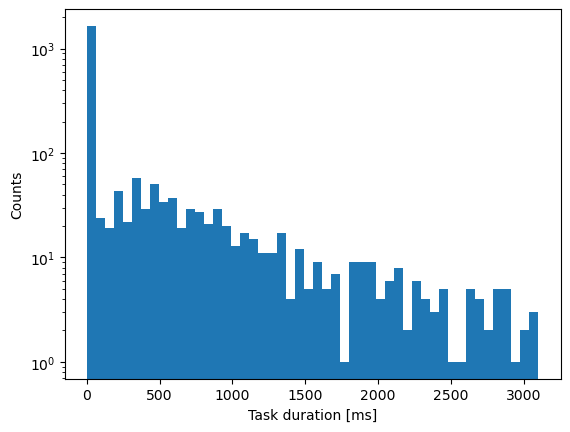

In [119]:
import pandas as pd

df = pd.DataFrame([(key, 1_000 * value) for key, value in plugin.task_durations.items()],
                  columns=["key", "duration"])
ax = df.duration.plot(kind="hist", bins=50, logy=True)
ax.set_xlabel("Task duration [ms]")
ax.set_ylabel("Counts");

In [83]:
client.close()
cluster.close()